<a href="https://colab.research.google.com/github/dkumar61/ML/blob/master/CaseStudy_Swati.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
! pip install h2o

     |████████████████████████████████| 164.8MB 81kB/s 
  Created wheel for h2o: filename=h2o-3.32.1.1-py2.py3-none-any.whl size=164840229 sha256=7cac10c2cc97c612bf7e4d97c1de22e6ed193533f83ad00af2a9b54269e2ba90
  Stored in directory: /root/.cache/pip/wheels/4d/94/84/02ea21db1eebcef2da872861ce0db478788e27d24bcd5394fb
Successfully built h2o


In [82]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime, date

# Comment this if the data visualisations doesn't work on your side
%matplotlib inline

plt.style.use('bmh')

In [155]:
#df = pd.read_excel('Health.xlsx', sheet_name='Training_Set')
df_test = pd.read_excel('Health.xlsx', sheet_name='Test_Set')

In [156]:
df.columns = df.columns.str.replace(' ','_')
df_test.columns = df.columns.str.replace(' ','_')

In [140]:
df.tail(1)

,Unique_ID,Case_Number,Date_of_Birth,Accident_State,Loss_Type,Loss_Date,Closed_Date,Report_Date,Cause_Description,Litigation_,Occupation,Carrier,Sector/Industry,Claim_Cost,High_Cost
37696,57661,3D448777148119,1995-02-11,NJ,Notice Only,2018-04-06 00:00:00,2018-05-03 00:00:00,2018-04-09 00:00:00,ANY AND ALL ANY AND ALL LLED UNCLASSIFIED ...,No,GENERAL LABOR,NaN,Materials,0.0,0


In [157]:
import numpy as np
now = pd.Timestamp('now')
df['Date_of_Birth'] = pd.to_datetime(df['Date_of_Birth'], format='%y%m%d')    # 1
df['Date_of_Birth'] = df['Date_of_Birth'].where(df['Date_of_Birth'] < now, df['Date_of_Birth'] -  np.timedelta64(100, 'Y'))   # 2
df['age'] = (now - df['Date_of_Birth']).astype('<m8[Y]') 

df_test['Date_of_Birth'] = pd.to_datetime(df_test['Date_of_Birth'], format='%y%m%d')    # 1
df_test['Date_of_Birth'] = df_test['Date_of_Birth'].where(df_test['Date_of_Birth'] < now, df_test['Date_of_Birth'] -  np.timedelta64(100, 'Y'))   # 2
df_test['age'] = (now - df_test['Date_of_Birth']).astype('<m8[Y]') 

In [158]:
#df_test['Difference'] = (df_test['First_Date'] - df_test['Second Date']).dt.days


In [147]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37697 entries, 0 to 37696
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Unique_ID          37697 non-null  int64         
 1   Case_Number        37697 non-null  object        
 2   Date_of_Birth      4750 non-null   datetime64[ns]
 3   Accident_State     37696 non-null  object        
 4   Loss_Type          37697 non-null  object        
 5   Loss_Date          37697 non-null  object        
 6   Closed_Date        35300 non-null  object        
 7   Report_Date        37679 non-null  object        
 8   Cause_Description  36952 non-null  object        
 9   Litigation_        37697 non-null  object        
 10  Occupation         14328 non-null  object        
 11  Carrier            6816 non-null   object        
 12  Sector/Industry    37697 non-null  object        
 13  Claim_Cost         37697 non-null  float64       
 14  High_C

count    4750.000000
mean       50.129263
std        12.848524
min        21.000000
25%        40.000000
50%        52.000000
75%        60.000000
max        99.000000
Name: age, dtype: float64


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


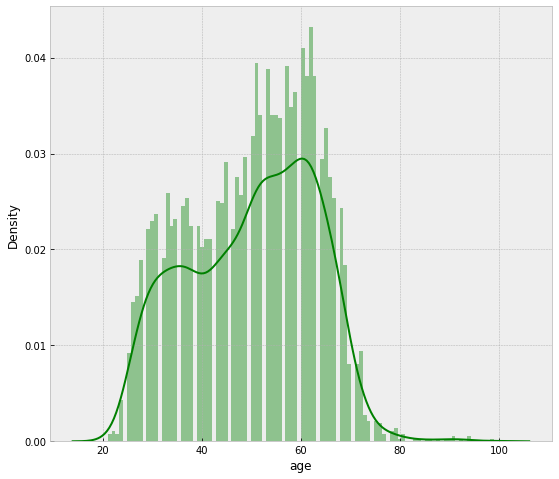

In [122]:
print(df['age'].describe())
plt.figure(figsize=(9, 8))
sns.distplot(df['age'], color='g', bins=100, hist_kws={'alpha': 0.4});

In [162]:
df.drop("Unique_ID", axis=1, inplace=True)
df.dropna(subset=["Date_of_Birth"], inplace=True)
df.drop("Case_Number", axis=1, inplace=True)
df.drop("Date_of_Birth", axis=1, inplace=True)
df.drop("Cause_Description", axis=1, inplace=True)
df.drop("Loss_Date", axis=1, inplace=True)
df.drop("Closed_Date", axis=1, inplace=True)
df.drop("Report_Date", axis=1, inplace=True)
df.rename(columns={'Sector/Industry': 'Industry'}, inplace=True)

df_test.drop("Unique_ID", axis=1, inplace=True)
df_test.dropna(subset=["Date_of_Birth"], inplace=True)
df_test.drop("Case_Number", axis=1, inplace=True)
df_test.drop("Date_of_Birth", axis=1, inplace=True)
df_test.drop("Cause_Description", axis=1, inplace=True)
df_test.drop("Loss_Date", axis=1, inplace=True)
df_test.drop("Closed_Date", axis=1, inplace=True)
df_test.drop("Report_Date", axis=1, inplace=True)
df_test.rename(columns={'Sector/Industry': 'Industry'}, inplace=True)


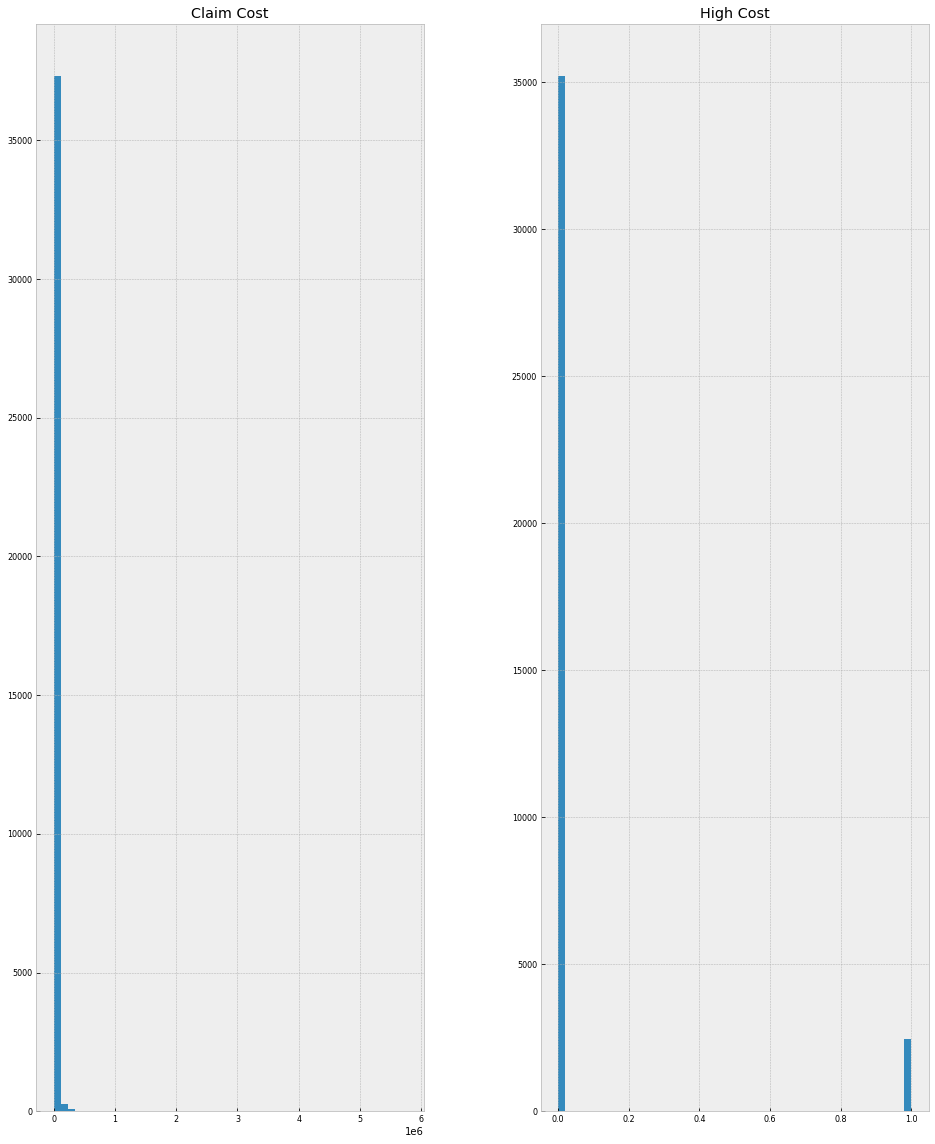

In [62]:
df_num.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8); # ; avoid having the matplotlib verbose informations

In [163]:
df_test.columns

Index(['Accident_State', 'Loss_Type', 'Litigation_', 'Occupation', 'Carrier',
       'Industry', 'Claim_Cost', 'High_Cost', 'age'],
      dtype='object')

In [66]:
import h2o
from h2o.estimators import H2ORandomForestEstimator
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.10" 2021-01-19; OpenJDK Runtime Environment (build 11.0.10+9-Ubuntu-0ubuntu1.18.04); OpenJDK 64-Bit Server VM (build 11.0.10+9-Ubuntu-0ubuntu1.18.04, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.7/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpcgjcejt8
  JVM stdout: /tmp/tmpcgjcejt8/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmpcgjcejt8/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,03 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.32.1.1
H2O_cluster_version_age:,16 days
H2O_cluster_name:,H2O_from_python_unknownUser_0s1got
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.180 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"accepting new members, healthy"


In [164]:
hf = h2o.H2OFrame(df)
hf_test = h2o.H2OFrame(df_test)

hf["Litigation_"] = hf["Litigation_"].asfactor()
hf_test["Litigation_"] = hf_test["Litigation_"].asfactor()
predictors = ['Accident_State', 'Loss_Type', 'Occupation', 'Carrier', 'Industry', 'Claim_Cost', 'High_Cost','age']
response = 'Litigation_'

Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%


In [131]:
train, valid = hf.split_frame(ratios=[.8], seed=1234)

In [132]:
# Build and train the model:
df_drf = H2ORandomForestEstimator(ntrees=10,
                                    max_depth=5,
                                    min_rows=10,
                                    calibrate_model=True,
                                    calibration_frame=valid,
                                    binomial_double_trees=True)

In [133]:
df_drf.train(x=predictors, y=response, training_frame=train, validation_frame=valid)

/usr/local/lib/python3.7/dist-packages/h2o/estimators/estimator_base.py:200: RuntimeWarning: Dropping bad and constant columns: [Industry, Carrier]
  warnings.warn(mesg["message"], RuntimeWarning)


drf Model Build progress: |███████████████████████████████████████████████| 100%


In [134]:
perf = df_drf.model_performance()

In [135]:
perf


ModelMetricsBinomial: drf
** Reported on train data. **

MSE: 0.05692247978635895
RMSE: 0.23858432426787587
LogLoss: 0.21405290646873246
Mean Per-Class Error: 0.14960877631685088
AUC: 0.9080276718253649
AUCPR: 0.6007904985691549
Gini: 0.8160553436507298

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.29319161292239504: 


,,No,Yes,Error,Rate
0,No,3217.0,164.0,0.0485,(164.0/3381.0)
1,Yes,131.0,254.0,0.3403,(131.0/385.0)
2,Total,3348.0,418.0,0.0783,(295.0/3766.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.293192,0.632628,175.0
1,max f2,0.180262,0.698824,228.0
2,max f0point5,0.324874,0.625954,165.0
3,max accuracy,0.324874,0.923526,165.0
4,max precision,0.922010,1.000000,0.0
5,max recall,0.000000,1.000000,399.0
6,max specificity,0.922010,1.000000,0.0
7,max absolute_mcc,0.293192,0.589494,175.0
8,max min_per_class_accuracy,0.086644,0.844156,279.0
9,max mean_per_class_accuracy,0.074413,0.850391,289.0



Gains/Lift Table: Avg response rate: 10.20 %, avg score:  9.85 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010223,0.771605,7.041065,7.041065,0.717949,0.812017,0.717949,0.812017,0.071979,0.071979,604.106519,604.106519,0.068769
1,2,0.020183,0.691560,7.742525,7.387240,0.789474,0.735099,0.753247,0.774058,0.077121,0.149100,674.252469,638.724001,0.143554
2,3,0.030144,0.644858,7.484441,7.419358,0.763158,0.668821,0.756522,0.739284,0.074550,0.223650,648.444054,641.935844,0.215478
3,4,0.040105,0.580935,6.710188,7.243225,0.684211,0.605874,0.738562,0.706150,0.066838,0.290488,571.018807,624.322462,0.278813
4,5,0.050066,0.518832,6.968272,7.188522,0.710526,0.551525,0.732984,0.675387,0.069409,0.359897,596.827222,618.852205,0.345011
5,6,0.100131,0.335145,4.980619,6.084570,0.507853,0.427220,0.620419,0.551303,0.249357,0.609254,398.061885,508.457045,0.566931
6,7,0.150197,0.186012,2.875409,5.014850,0.293194,0.249863,0.511344,0.450823,0.143959,0.753213,187.540882,401.484991,0.671485
7,8,0.200000,0.101763,1.187187,4.061697,0.121053,0.142182,0.414155,0.373966,0.059126,0.812339,18.718712,306.169666,0.681866
8,9,0.300131,0.052959,0.744525,2.955007,0.075916,0.069311,0.301310,0.272326,0.074550,0.886889,-25.547450,195.500724,0.653381
9,10,0.400000,0.039896,0.411851,2.320051,0.041995,0.046016,0.236566,0.215822,0.041131,0.928021,-58.814917,132.005141,0.587974


In [165]:
df_drf.predict(valid)

drf prediction progress: |████████████████████████████████████████████████| 100%


/usr/local/lib/python3.7/dist-packages/h2o/job.py:72: UserWarning: Test/Validation dataset column 'Accident_State' has levels not trained on: ["CO", "MT", "UT"]
  warnings.warn(w)
/usr/local/lib/python3.7/dist-packages/h2o/job.py:72: UserWarning: Test/Validation dataset column 'Occupation' has levels not trained on: ["4 PAPER MACHINE", "4/5 TOWEL TECH.", "4TH HAND #1", "58 DEPARTMENT DCM OPERATOR", "5TH HAND #1", "7 MACHINE TENDER / GP", "AC MECHANIC", "AREATOR OPERATOR", "ASSET AVAILABILITY LEADER", "ASST POWER / RECOVERY OPE", ...213 not listed..., "UTILITY/BOTTOM B OPERATOR", "UTILITY/ENCADRIA TEMP", "WAREHOUSE OPERATOR/GEORGIA PAC", "WAREHOUSE STACKER", "WATER TREATMENT OP", "WEB PRESS OPERATOR", "WOOD PREP MAINTENANCE", "WOOD YARD SCALER", "WOODYARD TECH 2 / GEORGIA PACI", "WOODYARD TECH/LR"]
  warnings.warn(w)


predict,No,Yes,cal_No,cal_Yes
Yes,0.238895,0.761105,0.0702498,0.92975
No,0.867493,0.132507,0.917644,0.0823563
Yes,0.231206,0.768794,0.0663633,0.933637
Yes,0.328276,0.671724,0.133216,0.866784
Yes,0.525518,0.474482,0.424113,0.575887
Yes,0.293277,0.706723,0.104252,0.895748
Yes,0.449737,0.550263,0.287425,0.712575
Yes,0.228962,0.771038,0.0652673,0.934733
Yes,0.20128,0.79872,0.0530667,0.946933
Yes,0.37266,0.62734,0.179428,0.820572


In [166]:
df_drf.predict(hf_test)

drf prediction progress: |████████████████████████████████████████████████| 100%


/usr/local/lib/python3.7/dist-packages/h2o/job.py:72: UserWarning: Test/Validation dataset column 'Accident_State' has levels not trained on: ["CO", "MT", "UT"]
  warnings.warn(w)
/usr/local/lib/python3.7/dist-packages/h2o/job.py:72: UserWarning: Test/Validation dataset column 'Occupation' has levels not trained on: ["4 PAPER MACHINE", "4/5 TOWEL TECH.", "4TH HAND #1", "58 DEPARTMENT DCM OPERATOR", "5TH HAND #1", "7 MACHINE TENDER / GP", "AC MECHANIC", "AREATOR OPERATOR", "ASSET AVAILABILITY LEADER", "ASST POWER / RECOVERY OPE", ...213 not listed..., "UTILITY/BOTTOM B OPERATOR", "UTILITY/ENCADRIA TEMP", "WAREHOUSE OPERATOR/GEORGIA PAC", "WAREHOUSE STACKER", "WATER TREATMENT OP", "WEB PRESS OPERATOR", "WOOD PREP MAINTENANCE", "WOOD YARD SCALER", "WOODYARD TECH 2 / GEORGIA PACI", "WOODYARD TECH/LR"]
  warnings.warn(w)


predict,No,Yes,cal_No,cal_Yes
Yes,0.238895,0.761105,0.0702498,0.92975
No,0.867493,0.132507,0.917644,0.0823563
Yes,0.231206,0.768794,0.0663633,0.933637
Yes,0.328276,0.671724,0.133216,0.866784
Yes,0.525518,0.474482,0.424113,0.575887
Yes,0.293277,0.706723,0.104252,0.895748
Yes,0.449737,0.550263,0.287425,0.712575
Yes,0.228962,0.771038,0.0652673,0.934733
Yes,0.20128,0.79872,0.0530667,0.946933
Yes,0.37266,0.62734,0.179428,0.820572
